In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Este programa contara con muchos comentarios para facilitar su comprension y calculo en cada paso

In [2]:
df = pd.read_excel("Dataset_MPG2.xlsx", sheet_name='Dataset_MPG', header = None, dtype = float) # Carga del set de datos
df_values= df.values #se convierte de dataframe a un array

df_group = df_values.copy() 
mpg = df_values[:,0] # se separa la variable a predecir
features_x = df_values[:,1:8] # Los 7 features usados para predecir
p_exactitud_nn = [] #Variable para presentar los errores
acu = [] #Variable para acumular los errores calculados

In [3]:
# Funcion para realizar la permutacion de los datos
def permutacion(train_size,semilla,f):
    np.random.seed(semilla)
    idx= np.random.rand(len(df_group))<train_size
   
    train = df_group[idx]
    train= np.array(train)
    train_mpg = train[:,0]
    train_x= train[:,1:f]
    
    test = df_group[~idx]
    test= np.array(test)
    test_mpg = test[:,0]
    test_x= test[:,1:f]
    
    return train_mpg,train_x, test_mpg,test_x,idx

In [4]:
#Para crear la permutacion y separar entre la data de entrenamiento y la de test
train_size= 0.733
semilla=8
f=8
y_train,X_train,y_test,X_test,idx = permutacion(train_size,semilla,f)
y_test= y_test.reshape(-1,1)

In [5]:
X= np.array(X_train,dtype=float) #Variable que contendra los 7 features y las 392 muestras
y= np.array(y_train,dtype = float) #Data a predecir con 392 muestras
y= y.reshape(-1,1) # se asegura que tenga la forma 392x1 para evitar problemas
# Se escalan las unidades para que queden entre 0-1 y no se cree un sesgo por la escala de estas
X = X/np.amax(X, axis=0) #se escala dividiendo entre el mayor
y = y/np.amax(y, axis=0) # igual se escala dividiendo entre el mayor
y.shape

(299, 1)

In [6]:
class red_neuronal(object): # Se crea una clase para facilitar la aplicación dentro tiene las distintas funciones que se necesitan
    def __init__(self): # self sera una función dentro de las demas para evitar la iteración de calcular los pesos en cada una
        
        #parametros iniciales de las capas de la red
        self.inputSize = 7 # se indica que la capa inicial (entradas) tiene un tamaño de 7
        self.hiddenSize = 3 # se indica que la capa oculta es de 7
        self.outputSize = 1 # capa de salida de 1
        
        #calculo de los pesos
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (7x3) matriz de pesos del input a la capa oculta
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) matriz de pesos de la capa oculta a la salida
  #--------------------------------------------------------------------------------------------------------------------------      
    def feedForward(self, X): #se hace el forward propagation en la red
        
        self.z = np.dot(X, self.W1) #producto punto entre X (392x7) y el primer set de pesos (7x3)
        self.z2 = self.sigmoid(self.z) #se hace la derivacion para este caso se decidio usar sigmoid ,(392x3) 
        self.z3 = np.dot(self.z2, self.W2) #se realiza el producto punto de la capa oculta resultante (z2) 392x3 y el segundo set de pesos (3x1)
        resultado = self.sigmoid(self.z3) # (392x1) # se hace la derivacion con sigmoid de la salida de la red
        return resultado
     #--------------------------------------------------------------------------------------------------------------------------      
    def sigmoid(self, s, deriv=False): # funcion sigmoid si se indica deriv = True se ealizara la derivacion utilizando la formula correspondiente
        if (deriv == True):
            return s * (1 - s) # en caso de que se derive se aplica esta formula que es la derivacion
        return 1/(1 + np.exp(-s)) # 1/1+e^-s
     #--------------------------------------------------------------------------------------------------------------------------  
    def backward(self, X, y, resultado): #funcion para hacer el backward propagation de la red y hacer que esta aprenda

        self.resultado_error = y - resultado # error in output (392x1) - (392x1) = (392x1), se resta el mpg real con el calculado para determinar las diferencias
        self.resultado_grad = self.resultado_error * self.sigmoid(resultado, deriv=True) #(392x1) *(392x1) = 392x1 se deriva utilizando sigmoid esas diferencias determinadas
      #--------------------------------------------------------------------------------------------------------------------------     
        self.z2_error = self.resultado_grad.dot(self.W2.T) # 392x1 *1x3 = 392x3 a partir de ese error entre los outputs se ajustara para la capa oculta 
        self.z2_grad = self.z2_error * self.sigmoid(self.z2, deriv=True) #el error determinado al comparar la salida y derivarse, despues se hace para la capa oculta
      #--------------------------------------------------------------------------------------------------------------------------   
        self.W1 += X.T.dot(self.z2_grad) # se ajusta el primer set de pesos, en este caso el que va de la entrada a la capa oculta
        self.W2 += self.z2.T.dot(self.resultado_grad) # se ajusta el segundo set de pesos, el que va de la capa oculta a la salida
        
    def train(self, X, y): # se realiza una funcion que incluya a las demas para solo deliminar la entrada y la data a estimar
        resultado = self.feedForward(X) # Se realiza la estimacion con la red neuronal a partir de la data X
        self.backward(X, y, resultado) # Se ajusta utilizando backward propagation comparando con la data original
       #--------------------------------------------------------------------------------------------------------------------------    
red = red_neuronal() 

for i in range(500): #Se entrena la red neuronal la cantidad de veces especificada, en este caso 500 veces

    acu=(np.mean(np.square(y - red.feedForward(X))))
    p_exactitud_nn.append(acu)
    red.train(X, y)
        


In [7]:
# Mediante la gráfica se conocerá el comportamiento de la red
grupos = np.linspace(1,500,500)

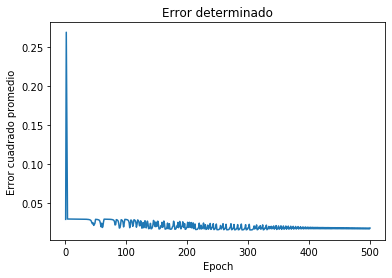

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Error cuadrado promedio')
ax1.set_xlabel('Epoch')
ax1.set_title('Error determinado')
plt.plot(grupos,p_exactitud_nn)